# 工具安装
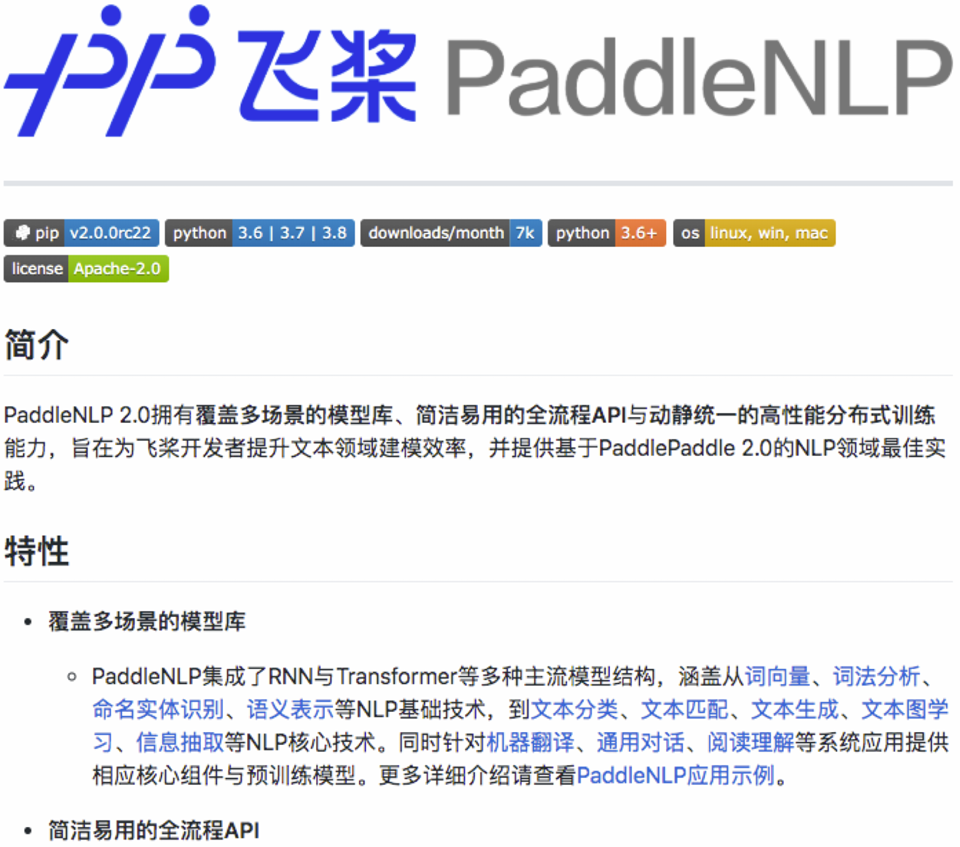

In [1]:
pip install paddlenlp

Looking in indexes: https://mirror.baidu.com/pypi/simple/, https://mirrors.aliyun.com/pypi/simple/

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 数据处理


### 1.数据查看
可见每条数据包含一句评论和对应的标签，{0: 'negative', 1: 'neutral', 2: 'positive'}分别对应负面、中立和积极情感

In [2]:
# 解压缩
!unzip 中文淘宝评论数据集.zip

Archive:  中文淘宝评论数据集.zip
  inflating: test.txt                
  inflating: train.txt               


查看训练集数据结构  
通过查看数据集文件发现：每3行为一条记录，分别为评价内容、评价分类、评价正负标签

In [3]:
with open( 'train.txt','r',encoding='utf-8') as f:
    for i in range(9):  # 读取前9行
        line = f.readline()
        if not line:  # 如果行为空（文件行数少于6行），提前结束
            break
        print(line.strip())  # 去掉行尾的换行符并打印

﻿质量 很棒 ！ 又 厚实 ， 就是 做工 不好 ， 就是 有点 味道 得 跑跑
做工
0
很好 ， 很漂亮 ， 质量 问题 就 不知道 了 ， 得用 用 才 知道 ， 这个 快递 太 垃圾 了
快递
0
价格 上面 反正 折扣 之后 就是 市场 销售价格 ， 搞 活动 也 就 随便说说 ， 挺好吃 的
价格
0


### 2.数据集格式转换

In [4]:
def read(data_path):
    data=['label'+'\t'+'text_a\n']
    with open(data_path, 'r', encoding='utf-8-sig') as f:
        lines=f.readlines()
        # 三行为一条记录
        for i in range(int(len(lines)/3)):
            # 读取第一行为内容
            word = lines[i*3].strip('\n') 
            # 读取第三行为标签
            label = lines[i*3+2].strip('\n')
            data.append(label+'\t'+word+'\n')
            i=i+1 
    return data  
with open('formated_train.txt','w') as f:
    f.writelines(read('train.txt'))

with open('formated_test.txt','w') as f:
    f.writelines(read('test.txt'))

查看转换后的文件格式

In [5]:
with open( 'formated_train.txt','r',encoding='utf-8') as f:
    for i in range(9):  # 读取前9行
        line = f.readline()
        if not line:  # 如果行为空（文件行数少于6行），提前结束
            break
        print(line.strip())  # 去掉行尾的换行符并打印

label	text_a
0	质量 很棒 ！ 又 厚实 ， 就是 做工 不好 ， 就是 有点 味道 得 跑跑
0	很好 ， 很漂亮 ， 质量 问题 就 不知道 了 ， 得用 用 才 知道 ， 这个 快递 太 垃圾 了
0	价格 上面 反正 折扣 之后 就是 市场 销售价格 ， 搞 活动 也 就 随便说说 ， 挺好吃 的
0	漂亮 好看 质量 好 就是 快递 不 给力 ， 派个件 要 派 两天
0	宝贝 很 满意 ， 发小 刚刚 好 ， 质量 也 不错 ， 值得 购买 ， 就是 快递 太慢 ， 昨天 才 到
0	行李箱 就 不错 啊 ！ 看上去 是 挺 结实 的 等 用 了 才 知道 是不是 真的 好 ！ 拉链 也 很 顺滑 ！ 快递 太差 ， 太慢
0	质量 很好 ， 发货 很快 ， 果断 给 好评 ！ 快递 小哥 有些 烦 ， 让 他 等 我 五分钟 ， 结果 五分钟 内 打 了 三次 电话 ！
0	颜色 很小 清新 ， 和 图片 一样 的 ， 送 的 贴纸 很 可爱 。 轮子 在 瓷砖 上 走 挺 小声 的 ， 要是 细节 处理 好 一点 就 完美 了 。 性价比 高 。 快递 没打 满分 一 是因为 不 给 送货 ， 二是 我 说 等验 完货 在 签 ， 她们 就 给 我 脸色 看 。


In [6]:
with open( 'formated_test.txt','r',encoding='utf-8') as f:
    for i in range(9):  # 读取前9行
        line = f.readline()
        if not line:  # 如果行为空（文件行数少于6行），提前结束
            break
        print(line.strip())  # 去掉行尾的换行符并打印

label	text_a
0	非常 漂亮 的 拉杆箱 ， 很 轻 ， 跟 店家 描述 的 一致 ， 快递 速度 不行 啊
0	款式 设计 的 很 好看 呀 ， 客服 态度 很好 ， 呃 ， 质量 感觉 不太好 奥 ， 就是 会 起球 ， 而且 快递 好慢 啊
0	超值 啊 哈哈哈 ， 就是 颜色 随机 我以 为什么 颜色 都 有 ， 结果 全是 一个 颜色 的 ， 不过 东西 好 就 可以 ， 物超所值 。
0	卖家 很好 ， 热情周到 ， 包装 严实 ， 遇到 快递 问题 都 极力 解决 。 我要 投诉 快递 ， 太差 了 。
0	比 想象 的 要 好得多 ， 音效 特别 好 ， 还 带 环绕 音 ， 总之 很 喜欢 ， 就是 这个 价格 不是 很 实惠
0	买大 了 一点 ， 不过 也 能 穿 ， 孩子 很 喜欢 ， 三件套 的 ， 春秋 都 可以 穿 ， 质量 还可以 ， 蓝色 的 绒 颜色 感觉 有点 陈旧 ， 还有 就是 有点 小贵 。 快递 公司 有点 小 差错 ， 不过 老板 很快 就 解决 了 。
0	质量 一般 ， 边板 是 多层板 ， 快递 太慢 了 ， 2 月 8 日 发货 ， 21 日才 到 。
0	挺好 的 ， 店家 很 用心 ， 包装 的 非常 好 ， 只是 快递 方面 太慢 了 ， 希望 这方面 还是 改进 下 ！


### 3.重写read方法读取自定义数据集
根据文件结构，自定义数据集

In [7]:
from paddlenlp.datasets import load_dataset

def read(data_path):
    with open(data_path, 'r', encoding='utf-8') as f:
        # 跳过列名
        next(f)
        for line in f:
            label,  word= line.strip('\n').split('\t')
            yield {'text': word, 'label': label}

# data_path为read()方法的参数
train_ds = load_dataset(read, data_path='formated_train.txt',lazy=False)
test_ds = load_dataset(read, data_path='formated_test.txt',lazy=False)
dev_ds = load_dataset(read, data_path='formated_test.txt',lazy=False)

In [8]:
print(len(train_ds))
print(train_ds.label_list)
for idx in range(10):
    print(train_ds[idx])

13339
None
{'text': '质量 很棒 ！ 又 厚实 ， 就是 做工 不好 ， 就是 有点 味道 得 跑跑', 'label': '0'}
{'text': '很好 ， 很漂亮 ， 质量 问题 就 不知道 了 ， 得用 用 才 知道 ， 这个 快递 太 垃圾 了', 'label': '0'}
{'text': '价格 上面 反正 折扣 之后 就是 市场 销售价格 ， 搞 活动 也 就 随便说说 ， 挺好吃 的', 'label': '0'}
{'text': '漂亮 好看 质量 好 就是 快递 不 给力 ， 派个件 要 派 两天', 'label': '0'}
{'text': '宝贝 很 满意 ， 发小 刚刚 好 ， 质量 也 不错 ， 值得 购买 ， 就是 快递 太慢 ， 昨天 才 到', 'label': '0'}
{'text': '行李箱 就 不错 啊 ！ 看上去 是 挺 结实 的 等 用 了 才 知道 是不是 真的 好 ！ 拉链 也 很 顺滑 ！ 快递 太差 ， 太慢', 'label': '0'}
{'text': '质量 很好 ， 发货 很快 ， 果断 给 好评 ！ 快递 小哥 有些 烦 ， 让 他 等 我 五分钟 ， 结果 五分钟 内 打 了 三次 电话 ！', 'label': '0'}
{'text': '颜色 很小 清新 ， 和 图片 一样 的 ， 送 的 贴纸 很 可爱 。 轮子 在 瓷砖 上 走 挺 小声 的 ， 要是 细节 处理 好 一点 就 完美 了 。 性价比 高 。 快递 没打 满分 一 是因为 不 给 送货 ， 二是 我 说 等验 完货 在 签 ， 她们 就 给 我 脸色 看 。', 'label': '0'}
{'text': '虽然 安装 师傅 不 给力 ， 但是 东西 真的 很 给力 ！ 很 喜欢 好评 ！', 'label': '0'}
{'text': '外观 还可以 ， 送 了 很多 贴画 ， 蛮 细心 的 。 快递 送 在 超市 门口 打个 电话 就 走 了 ， 结果 被 别人 拿走 了 ， 好歹 又 送 回来 了 & hellip ; & hellip ; 真是 糟心 ！', 'label': '0'}


# 使用预训练模型

### 1.选取预训练模型

In [9]:
import paddlenlp as ppnlp

# 设置想要使用模型的名称
MODEL_NAME = "ernie-1.0"
ernie_model  = ppnlp.transformers.ErnieModel.from_pretrained(MODEL_NAME)
model = ppnlp.transformers.ErnieForSequenceClassification.from_pretrained(MODEL_NAME, num_classes=3)

[2024-07-06 18:19:14,741] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ernie-1.0/ernie_v1_chn_base.pdparams
W0706 18:19:14.745045   213 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 12.0, Runtime API Version: 10.1
W0706 18:19:14.750336   213 device_context.cc:422] device: 0, cuDNN Version: 7.6.
[2024-07-06 18:19:18,943] [    INFO] - Weights from pretrained model not used in ErnieModel: ['cls.predictions.layer_norm.weight', 'cls.predictions.decoder_bias', 'cls.predictions.transform.bias', 'cls.predictions.transform.weight', 'cls.predictions.layer_norm.bias']
[2024-07-06 18:19:19,239] [    INFO] - Already cached /home/aistudio/.paddlenlp/models/ernie-1.0/ernie_v1_chn_base.pdparams


### 2.调用ppnlp.transformers.ErnieTokenizer进行数据处理

预训练模型ERNIE对中文数据的处理是以字为单位。PaddleNLP对于各种预训练模型已经内置了相应的tokenizer。指定想要使用的模型名字即可加载对应的tokenizer。

tokenizer作用为将原始输入文本转化成模型model可以接受的输入数据形式。

![](https://bj.bcebos.com/paddlehub/paddlehub-img/ernie_network_1.png)

![](https://bj.bcebos.com/paddlehub/paddlehub-img/ernie_network_2.png)

In [10]:
tokenizer = ppnlp.transformers.ErnieTokenizer.from_pretrained(MODEL_NAME)

[2024-07-06 18:19:20,923] [    INFO] - Found /home/aistudio/.paddlenlp/models/ernie-1.0/vocab.txt


从以上代码可以看出，ERNIE模型输出有2个tensor。

* sequence_output是对应每个输入token的语义特征表示，shape为(1, num_tokens, hidden_size)。其一般用于序列标注、问答等任务。
* pooled_output是对应整个句子的语义特征表示，shape为(1, hidden_size)。其一般用于文本分类、信息检索等任务。\

NOTE:

* 如需使用ernie-tiny预训练模型，则对应的tokenizer应该使用paddlenlp.transformers.ErnieTinyTokenizer.from_pretrained('ernie-tiny')
* 
* 以上代码示例展示了使用Transformer类预训练模型所需的数据处理步骤。为了更方便地使用，PaddleNLP同时提供了更加高阶API，一键即可返回模型所需数据格式。

### 3.数据读取
使用paddle.io.DataLoader接口多线程异步加载数据。

In [11]:
from functools import partial
from paddlenlp.data import Stack, Tuple, Pad
from utils import  convert_example, create_dataloader

# 模型运行批处理大小
batch_size = 200
max_seq_length = 128

trans_func = partial(
    convert_example,
    tokenizer=tokenizer,
    max_seq_length=max_seq_length)
batchify_fn = lambda samples, fn=Tuple(
    Pad(axis=0, pad_val=tokenizer.pad_token_id),  # input
    Pad(axis=0, pad_val=tokenizer.pad_token_type_id),  # segment
    Stack(dtype="int64")  # label
): [data for data in fn(samples)]
train_data_loader = create_dataloader(
    train_ds,
    mode='train',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)
dev_data_loader = create_dataloader(
    dev_ds,
    mode='dev',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)

### 4.设置Fine-Tune优化策略，接入评价指标
可自行更改训练参数

In [12]:
from paddlenlp.transformers import LinearDecayWithWarmup
import paddle

# 训练过程中的最大学习率
learning_rate = 5e-5 
# 训练轮次
epochs = 5 #3
# 学习率预热比例
warmup_proportion = 0.1
# 权重衰减系数，类似模型正则项策略，避免模型过拟合
weight_decay = 0.01

num_training_steps = len(train_data_loader) * epochs
lr_scheduler = LinearDecayWithWarmup(learning_rate, num_training_steps, warmup_proportion)
optimizer = paddle.optimizer.AdamW(
    learning_rate=lr_scheduler,
    parameters=model.parameters(),
    weight_decay=weight_decay,
    apply_decay_param_fun=lambda x: x in [
        p.name for n, p in model.named_parameters()
        if not any(nd in n for nd in ["bias", "norm"])
    ])

criterion = paddle.nn.loss.CrossEntropyLoss()
metric = paddle.metric.Accuracy()

# 模型训练与评估
模型训练的过程通常有以下步骤：

1. 从dataloader中取出一个batch data
2. 将batch data喂给model，做前向计算
3. 将前向计算结果传给损失函数，计算loss。将前向计算结果传给评价方法，计算评价指标。
4. loss反向回传，更新梯度。重复以上步骤。

每训练一个epoch时，程序将会评估一次，评估当前模型训练的效果。

In [13]:
import paddle.nn.functional as F
from utils import evaluate

global_step = 0
for epoch in range(1, epochs + 1):
    for step, batch in enumerate(train_data_loader, start=1):
        input_ids, segment_ids, labels = batch
        logits = model(input_ids, segment_ids)
        loss = criterion(logits, labels)
        probs = F.softmax(logits, axis=1)
        correct = metric.compute(probs, labels)
        metric.update(correct)
        acc = metric.accumulate()

        global_step += 1
        if global_step % 10 == 0 :
            print("global step %d, epoch: %d, batch: %d, loss: %.5f, acc: %.5f" % (global_step, epoch, step, loss, acc))
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.clear_grad()
    evaluate(model, criterion, metric, dev_data_loader)

global step 10, epoch: 1, batch: 10, loss: 0.89179, acc: 0.64650
global step 20, epoch: 1, batch: 20, loss: 0.67068, acc: 0.67050
global step 30, epoch: 1, batch: 30, loss: 0.71446, acc: 0.67517
global step 40, epoch: 1, batch: 40, loss: 0.71137, acc: 0.68600
global step 50, epoch: 1, batch: 50, loss: 0.64388, acc: 0.69320
global step 60, epoch: 1, batch: 60, loss: 0.66246, acc: 0.69983
eval loss: 0.59144, accu: 0.74376
global step 70, epoch: 2, batch: 3, loss: 0.54751, acc: 0.76000
global step 80, epoch: 2, batch: 13, loss: 0.65362, acc: 0.75615
global step 90, epoch: 2, batch: 23, loss: 0.52508, acc: 0.76391
global step 100, epoch: 2, batch: 33, loss: 0.45736, acc: 0.76727
global step 110, epoch: 2, batch: 43, loss: 0.54882, acc: 0.76233
global step 120, epoch: 2, batch: 53, loss: 0.43903, acc: 0.76349
global step 130, epoch: 2, batch: 63, loss: 0.46870, acc: 0.76627
eval loss: 0.51229, accu: 0.76129
global step 140, epoch: 3, batch: 6, loss: 0.40196, acc: 0.80000
global step 150, ep

# 模型预测
训练保存好的训练，即可用于预测。如以下示例代码自定义预测数据(可自行更改文本），调用predict()函数即可一键预测。

In [15]:
from utils import predict

data = [
    {"text":'数据挖掘课程非常的有趣，学到了很多东西。'},
    {"text":'高等数学课程有点困难，我学起来力不从心。'},
    {"text":'一食堂的饭菜感觉都是预制菜，菜品种类也不多，总体来说一般。'},
]
label_map = {0: '负面', 1: '中立', 2: '正面'}

results = predict(
    model, data, tokenizer, label_map, batch_size=batch_size)
for idx, text in enumerate(data):
    print('预测: {} \t 情感: {}'.format(text, results[idx]))

预测: {'text': '数据挖掘课程非常的有趣，学到了很多东西。'} 	 情感: 正面
预测: {'text': '高等数学课程有点困难，我学起来力不从心。'} 	 情感: 负面
预测: {'text': '一食堂的饭菜感觉都是预制菜，菜品种类也不多，总体来说一般。'} 	 情感: 中立
